In [1]:
import urllib
from urllib.request import urlopen
import json
from bs4 import BeautifulSoup
import pandas as pd

import requests
import urllib.parse

Staff on "https" protocal
---
Another reason why we do not scrape directly from the web site is the internet protocal, **https**, used in tenlong bookstore, which rejects all the possible malicious, including scrapping. 
However, hackers should change header of browser to do what they want to do. 
This is an urgent issue in server security task.

In [ ]:
# Load saved file, 

In [2]:

url='https://www.is.cgu.edu.tw/portal/DesktopDefault.aspx?tabid=61&tabindex=2&PS=JkRQPTUwMDAmVE09NDY%3d-ifSLBw%2b9J8c%3d'

headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:23.0) Gecko/20100101 Firefox/23.0'}  
#req = urllib.request.Request(url=chaper_url, headers=headers)
req = urllib.request.Request(url=url, headers=headers)  

# begin to load the target data
html=urlopen(req).read() 
# parse the result by html syntax
bsObj = BeautifulSoup(html, "html.parser")


s=''
for child in bsObj.find("table",{"id":"_ctl2_myGrid"}).children:
    child.
    print(child)


In [3]:
table=bsObj.find("table",{"id":"_ctl2_myGrid"})

In [4]:
table

<table border="1" bordercolor="#DEDFDE" cellpadding="4" cellspacing="0" id="_ctl2_myGrid" rules="cols" style="color:Black;background-color:White;border-color:#DEDFDE;border-width:1px;border-style:None;border-collapse:collapse;">
<tr align="Center" nowrap="nowrap" style="color:White;background-color:#6B696B;font-weight:bold;" valign="Middle">
<td nowrap="nowrap">學年/學期<br><font size="2">Semester</font></br></td><td nowrap="nowrap"><a href="javascript:__doPostBack('_ctl2$myGrid$_ctl1$_ctl0','')" style="color:White;">科目代號<br><font size="2">Course Code</font></br></a></td><td nowrap="nowrap"><a href="javascript:__doPostBack('_ctl2$myGrid$_ctl1$_ctl1','')" style="color:White;">開課序號<br><font size="2">Serial No.</font></br></a></td><td nowrap="nowrap"><a href="javascript:__doPostBack('_ctl2$myGrid$_ctl1$_ctl2','')" style="color:White;">開課單位<br><font size="2">Department</font></br></a></td><td nowrap="nowrap"><a href="javascript:__doPostBack('_ctl2$myGrid$_ctl1$_ctl3','')" style="color:White;">

In [5]:

length=10

id='_ctl2_myGrid'

In [3]:
class HTMLTableParser:
       
        def parse_url(self, url):
            #id='_ctl2_myGrid'
            response = requests.get(url)
            soup = BeautifulSoup(response.text, 'lxml')
            table=bsObj.find("table",{"id":"_ctl2_myGrid"})
            return [(table,self.parse_html_table(table))]
            #return [(table['id'],self.parse_html_table(table))\
            #        for table in soup.find_all('table')]  
    
        def parse_html_table(self, table):
            n_columns = 0
            n_rows=0
            column_names = []
    
            # Find number of rows and columns
            # we also find the column titles if we can
            for row in table.find_all('tr'):
                
                # Determine the number of rows in the table
                td_tags = row.find_all('td')
                if len(td_tags) > 0:
                    n_rows+=1
                    if n_columns == 0:
                        # Set the number of columns for our table
                        n_columns = len(td_tags)
                        
                # Handle column names if we find them
                th_tags = row.find_all('th') 
                if len(th_tags) > 0 and len(column_names) == 0:
                    for th in th_tags:
                        column_names.append(th.get_text())
    
            # Safeguard on Column Titles
            if len(column_names) > 0 and len(column_names) != n_columns:
                raise Exception("Column titles do not match the number of columns")
    
            columns = column_names if len(column_names) > 0 else range(0,n_columns)
            df = pd.DataFrame(columns = columns,
                              index= range(0,n_rows))
            row_marker = 0
            for row in table.find_all('tr'):
                column_marker = 0
                columns = row.find_all('td')
                for column in columns:
                    df.iat[row_marker,column_marker] = column.get_text()
                    column_marker += 1
                if len(columns) > 0:
                    row_marker += 1
                    
            # Convert to float if possible
            for col in df:
                try:
                    df[col] = df[col].astype(float)
                except ValueError:
                    pass
            
            return df


In [6]:
hp = HTMLTableParser()
table = hp.parse_url(url)[0][1]

In [6]:
table

,0,1,2,3,4,5,6,7,8,9
0,學年/學期Semester,科目代號Course Code,開課序號Serial No.,開課單位Department,年級Year,課程名稱Course Title,授課教師Instructor,學分Credits,上課時間Class Sched.,選課人數Seats
1,\r\n106/ \r\n2\r\n,\nGH0093\n,\r\n27251\n,\n通識中心\n,\r\n2\r\n,\r\n張愛玲小說選讀\nThe Selected Readings of Eileen C...,\n林美清\n,\r\n2\r\n \n,\r\nWed 10:10-12:00\r\n,\r\n35/ \r\n65\r\n
2,\r\n106/ \r\n2\r\n,\nGD0058\n,\r\n29883\n,\n通識中心\n,\r\n1\r\n,\r\n歌劇與歌劇院\nOpera and Opera Houses\n \r\n \r...,\n洪于淳\n,\r\n3\r\n \n,\r\nWed 09:10-12:00\r\n,\r\n32/ \r\n70\r\n
3,\r\n106/ \r\n2\r\n,\nGD0076\n,\r\n30121\n,\n通識中心\n,\r\n1\r\n,\r\n文學中的現代軌跡\nModern Fiction\n \r\n \r\n\r\n,\n林美清\n,\r\n3\r\n \n,\r\nFri 13:10-16:00\r\n,\r\n70/ \r\n70\r\n
4,\r\n106/ \r\n2\r\n,\nGD0077\n,\r\n30129\n,\n通識中心\n,\r\n1\r\n,\r\n傳記文學選讀及寫作\nSelected Readings in Biographic...,\n陳姿蓉\n,\r\n3\r\n \n,\r\nTue 15:10-18:00\r\n,\r\n70/ \r\n70\r\n
5,\r\n106/ \r\n2\r\n,\nGD0078\n,\r\n30130\n,\n通識中心\n,\r\n1\r\n,\r\n現代詩與當代文化\nModern Poetry and Contemporary C...,\n劉德玲\n,\r\n3\r\n \n,\r\nTue 13:10-16:00\r\n,\r\n51/ \r\n70\r\n
6,\r\n106/ \r\n2\r\n,\nGD0079\n,\r\n30131\n,\n通識中心\n,\r\n1\r\n,\r\n寓言-經典與多元思維\nFables：A Multidimensional View...,\n韓學宏\n,\r\n3\r\n \n,\r\nWed 09:10-12:00\r\n,\r\n70/ \r\n70\r\n
7,\r\n106/ \r\n2\r\n,\nGD0080\n,\r\n30132\n,\n通識中心\n,\r\n1\r\n,\r\n台灣詩．鄉土情\nThe Taiwan Poetry Country Love\n ...,\n徐慧鈺\n,\r\n3\r\n \n,\r\nWed 09:10-12:00\r\n,\r\n70/ \r\n70\r\n
8,\r\n106/ \r\n2\r\n,\nGD0081\n,\r\n30133\n,\n通識中心\n,\r\n1\r\n,\r\n音樂的語言\nThe Language of Music\n \r\n \r\n...,\n周悅如\n,\r\n3\r\n \n,\r\nMon 15:10-18:00\r\n,\r\n17/ \r\n70\r\n
9,\r\n106/ \r\n2\r\n,\nGD0082\n,\r\n30134\n,\n通識中心\n,\r\n1\r\n,\r\n倫理與美學：電影與戲劇中的莎士比亞\nEthics and Aesthetics i...,\n鄭惠芳\n,\r\n3\r\n \n,\r\nWed 09:10-12:00\r\n,\r\n33/ \r\n70\r\n


In [7]:
# get rid of carrier return and new line
df1=table.replace({r'\r\n': ''}, regex=True)
#table.replace({r'\n': ''}, regex=True)
df=df1.replace({r'\n': ''}, regex=True)

In [8]:
# rename the column name as origin data[0]
df3=df.rename(columns=df.iloc[0])
df4=df3.drop(df3.index[0])
df4['num']=0

In [14]:
for i in range(0,len(df4)):
    df4['num'][i]=df4['選課人數Seats'].iloc(0)[i].split('/')[0]
    #print(i,df4['選課人數Seats'].iloc(0)[i].split('/')[0],df4['num'][i])

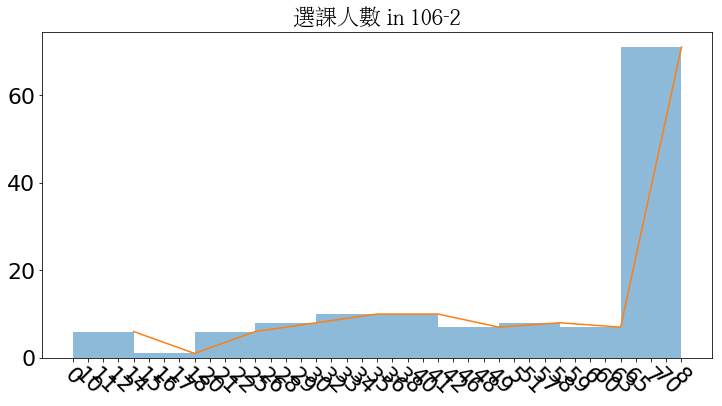

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import matplotlib.font_manager as font_manager
from  matplotlib import rcParams
rcParams.update({'font.size': 22})
font_chinese = FontProperties(fname="/Users/cch/Library/Fonts/fireflysung.ttf")  
plt.figure(figsize=(12,6))
avg=df4['num'].values
n, bins, patches=plt.hist(avg,alpha=0.5)
plt.plot(bins[1:],n)
#plt.xlim([0,80])
plt.xticks(rotation=-45)
#plt.axis([0, 80, 0, 80])
plt.title('選課人數 in 106-2',fontproperties=font_chinese);


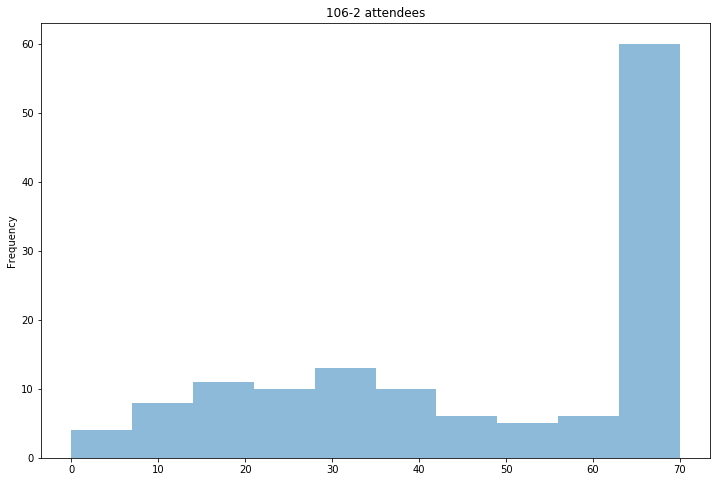

In [16]:
df4['num'] = df4['num'].apply(pd.to_numeric)
df4['num'].plot.hist(figsize=(12,8),alpha=0.5,title='106-2 attendees');